# COGS 118A - Final Project

## Group members

- Zirui Lin
- Ruoxin Li
- Yunhan Xiao
- Yongxi Liang
- Ruoqian Huang

# Abstract
Disease prediction has always been a critical and never-ending problem for the medical field - we will always need to be more precise in diagnosing diseases. Automated learning algorithms may help doctors alleviate some of the hassles. The main goal of this study was to determine the probability of a new patient developing heart disease based on existing data on heart disease characteristics. After preprocessing the data, we plan to train the computer using different machine learning methods (e.g., decision tree/logistic regression models vs. support vector classifiers, etc.) Our aim is for the model to successfully determine a heart attack (disease or not) in a subject when faced with a new set of data. We will quantify the performance of the models using various error metrics (e.g., precision, recall) for the results obtained - more importantly, due to the inherent sensitivity of heart disease, we will choose the best model according to the reality of the situation (e.g., we need to ensure the lowest non-detection rate) or we can replace/add new models as the project progresses / add new models.

# Background

Heart disease mainly refers to various diseases that occur in the heart and the surrounding vascular system, such as coronary heart disease, hypertension, cardiomyopathy, etc. These diseases have had a serious impact on health and longevity worldwide, and their morbidity and mortality rates have been increasing over the past few decades. With an aging population, unhealthy lifestyles and changing dietary habits, the incidence of heart disease has shown an increasing trend. According to the World Health Organization (WHO)<a name="lorenznote"></a>[<sup>[1]</sup>](#lorenz), heart disease is one of the leading causes of death worldwide, killing approximately 18 million people each year. It is predicted that by 2035, heart disease will become one of the major global disease burdens, posing a serious threat to global public health.<br>

Heart disease remains an extremely complex disease whose etiology is influenced by a combination of many factors, such as genetics, environment, and lifestyle. In addition, new risk factors have been identified in recent years, such as air pollution and mental stress. All of these factors may contribute to the development and aggravation of heart disease, thus increasing mortality. With the continuous advancement of technological techniques and methods in today's society, researchers can now study the pathogenesis and treatment of heart disease in greater depth through automated learning algorithms<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). Automatic learning algorithms are a new technology that can automatically learn and analyze from large amounts of data and use it for prediction and judgment. In predicting heart disease, they can learn and build prediction models from clinical information of heart disease patients, which can be very helpful for doctors to more accurately understand the risk level of patients and develop effective treatment plans<a name="sota"></a>[<sup>[3]</sup>](#sotanote). Moreover, by training a large number of clinical data from heart disease patients, features and patterns are extracted and prediction models are built. This allows us to predict the risk of heart disease in patients and to develop individualized treatment plans for patients based on the prediction results.<br>

In conclusion, heart disease has seriously affected global health problems and requires the concerted efforts of medical researchers worldwide. Therefore, in-depth research of the causative factors and treatments of heart disease, and the search for powerful treatments and effective preventive measures can make an important contribution to reducing the incidence and mortality of heart disease.


# Problem Statement

We aim to utilize machine learning algorithms for analyzing the current datasets, and train a predictive model that is most suitable to improve the accuracy of heart disease diagnosis based on the patient's various health indicators. Heart disease prediction model can help identify high-rish individuals which can lead to early intervention and treatment, ultimately preventing or delaying the onset of disease.

# Data

**Heart disease Dataset**  <br>
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease<br>
319795 observations with 18 variables<br>
Critical variables:

- HeartDisease
- BMI `(Body Mass Index: underweight <18.5; normal 18.5-24.9; overweight 25-29.9; obese >30) `
- Smoking` (smoked >= 100 cigrettes(5 packs))`
- Alcohol Drinking `(male >14 drinks and female >7 drinkd per week)`
- Stroke `（previously suffered a stroke)`
- PhysicalHealth `(for how many days during the past 30 days was your physical health not good (includes physical illness and injury)? (0-30 days))`
- MentalHealth `(for how many days during the past 30 days was your mental health not good? (0-30 days))`
- DiffWalking `(have serious difficulty walking or climbing stairs)`
- Sex
- AgeCategory
- Race
- Diabetic `（had diabetics)`
- PhysicalActivity `(reported doing physical activity or exercise during the past 30 days other than their regular job (yes or no))`
- GenHealth `(health condition in general)`
- SleepTime `(On average, how many hours of sleep do you get in a 24-hour period)`
- Asthma `（had asthma)`
- KidneyDisease `（had KidneyDisease)`
- SkinCancer `（had SkinCancer)`

This dataset was from 2020 annual CDC survey data of adults related to their health status.


In [ ]:
#import packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer

In [ ]:
dataset=pd.read_csv('heart_2020_cleaned.csv')
dataset.head()
#Check if the data has been imported successfully

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Proposed Solution
We aim to achieve the discrimination of cardiac patients using supervised machine learning models, relying on the features given in the data. For this purpose, we will segment some of the feature data from a random healthy or diseased population and use it as a test set to evaluate the model results. For data preprocessing, we would encode the categorical variables with numberical values. We would unify all the data into the same format for later use during data preprocessing. 

We will use these features for algorithm selection to try to build logistic regression, SVM and random forest models. Below is a specific explanation for each of these models in this project.<br><br>


Logistic regression:<br>
The main feature of logistic regression is its ability to fit a decision boundary linearly. Since two outcomes exist in our dataset: Patients who are sick (1) or healthy (0). In addition to the training and test sets, we will split a certain amount of data into the data and create a validation set. For the selection of the best hyperparameters, we expect to use a gradient descent approach to find the method that minimizes the loss function and use the validation set to evaluate the parameters based on the obtained F1 data. Finally, we will use the test set for prediction and evaluate the model results using accuracy, recall, and F1 data.<br><br>


SVM:<br>
The SVM is characterized by its ability to find a hyperplane to separate the classes while creating maximum margins between classes, i.e., making the distinction between each class the most obvious. This is determined by the support vector in the category and can be achieved by minimizing the loss function. We will use linear SVM because our dataset is large, and linear SVM is well adapted to large datasets. Since our classification is binary, we believe there will be no curvature in the linear SVM. After building the test and training sets, we will use the one-to-one classifier to classify the model and later evaluate the model (this will be explained later).<br><br>

Random Forest:<br>

Random forests are characterized by their ability to ensemble multiple decision tree models, each using a random subset of the training data. We mainly use random forests because decision tree models are well suited for classification problems, and random number models have more advantages over decision trees. The two most important ones are:
 1. Random forests can evaluate the impact of different features on the results because the features used in each decision tree in the forest are arbitrary. For some of them, some features are removed from the model training features. The random forest results will reflect the impact of eliminating these features on the results. This will help us determine each feature's effect on disease causation, which is important in reality for disease prevention. 
 2. The regression forest also prevents overfitting by averaging the results of multiple decision tree models, which is essential for the large number of features we use.

<br>


For model performance evaluation, we will use accuracy, precision, F1 score, and recall rate to evaluate the performance of the models and use cross-validation to prevent overfitting. For the baseline approach, we will use the logistic regression model as the baseline model because this model is very interpretable and the impact of different features on the final result can be seen from the weights of the features; and it itself does not require scaling of the features and takes up less computational resources. In addition, we will visualize the prediction results of the model, which includes drawing icons with confusion matrices.

# Evaluation Metrics

We are going to use several classification metrics such as precision and recall to assess the validity of our model. Precision = TP / (TP + FP). A higher precision value means we can correctly identify a larger proportion of positive predictions among all positive predictions. Recall = TP / (TP + FN). A higher recall value means we can correctly identify a larger proportion of positive cases in the dataset. Thus, we are better at identifying patients who actually have heart disease, and we are less likely to miss patients who require further diagnosis and treatments. We can also calculate the Fl score from precision and recall to find a good balance between these metrics.

# Results




## Data cleaning and analysis




As part of the data cleaning process, addressing missing values and duplicate entries is crucial to ensure the reliability of the dataset. We decided to delete any column(s) that contain missing values, as they may introduce biases or inaccurancies in the following analyses. 

In [ ]:
# Delete the column with missing values
dataset = dataset.dropna(axis=1)

# Find the duplicates
duplicates = dataset[dataset.duplicated()]

# Delete the duplicates
data = dataset.drop_duplicates()


Next, we will present a visual display of the relationship between various categories and heart disease. Specifically, we examine all categories in the dataset.
By examining each of these categories in relation to heart disease, we hope to gain a better understanding of the factors that may contribute to increased risk of developing this condition. Through the use of graphical displays and statistical analysis, we aim to identify patterns and trends that may inform future research and clinical practice.

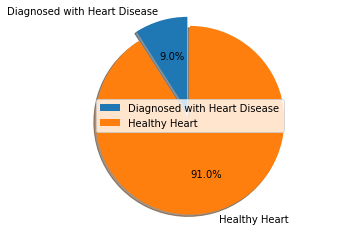

In [ ]:
heart_disease_yes = data[data['HeartDisease'] =='Yes'].shape[0]

#counts the number of people with heart disease in the dataset 
#by filtering out the rows in the dataset with a 'Yes' value for the HeartDisease column

heart_disease_no = data[data['HeartDisease'] =='No'].shape[0]

#filtering out the rows in the dataset with a 'No' value

labels = 'Diagnosed with Heart Disease', 'Healthy Heart'

#Defined the labels for each part of the pie chart, 
#i.e. "heart disease" and "healthy heart"

sizes = [heart_disease_yes,heart_disease_no]
explode = (0, 0.1)  

# only "explode" the 2nd slice (i.e. 'Healthy Heart')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

# Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()


In [ ]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


This segment below creates a pie chart showing the proportion of people with heart disease with a general health condition based on five categories. It calculates the five public health conditions from the dataset using Boolean indexes and stores their number in variables. Then, it uses the pie() function of the matplotlib library to create a pie chart labeled with the percentage of each category. Finally, it sets the chart title to "GenHealth," ensuring that the aspect ratios of the pie chart are equal, thus creating a circular pie chart.

(-1.176023752350331, 1.103620178683349, -1.103447237078409, 1.1724227527346478)

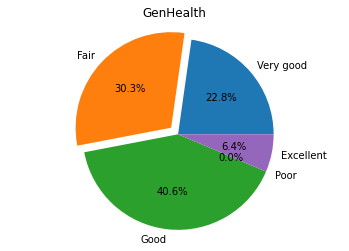

In [ ]:
#GenHealth
fig, ax = plt.subplots()
verygood = data[(data['HeartDisease'] =='Yes' )& (data['GenHealth'] == 'Very good')].shape[0]
fair = data[(data['HeartDisease'] =='Yes' )& (data['GenHealth'] == 'Fair')].shape[0]
good=data[(data['HeartDisease'] =='Yes' )& (data['GenHealth'] == 'Good')].shape[0]
poor =data[(data['HeartDisease'] =='Yes') & (data['GenHealth'] == 'poor')].shape[0]
excellent =data[(data['HeartDisease'] =='Yes') & (data['GenHealth'] == 'Excellent')].shape[0]

# use boolean indexing to count the number of people in the dataset 
# who have heart disease and rated their general health status

labels = 'Very good', 'Fair','Good','Poor','Excellent'
sizes = [verygood, fair, good, poor, excellent]
explode = (0, 0.1,0,0,0)

# import different elements to compose char plot

ax.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
ax.set_title("GenHealth")
ax.axis('equal')  

# Equal aspect ratio ensures that pie is drawn as a circle.

The code below generates multiple pie charts, each showing the distribution of a categorical variable among people with heart disease. There are 16 pie charts in total. They cover BMI, smoking, alcohol drinking, stroke, physical and mental health, difficulty walking, sex, age category, race, diabetes, physical activity, sleep time, and asthma.

The code creates a separate pie chart for each variable using the matplotlib library. The size of each pie slice corresponds to the proportion of people who have heart disease and belong to a specific variable category. The legend shows the category name and the percentage of people with heart disease who belong to that category.

This code aims to visually explore the relationship between categorical variables and heart disease. It allows us to see which categories of each variable are more or less represented among people with heart disease. The pie charts can help us identify potential risk factors for heart disease and prioritize interventions to reduce the burden of this disease.

(-1.1882565634751425,
 1.1042026934988163,
 -1.154175072471332,
 1.0458248188533683)

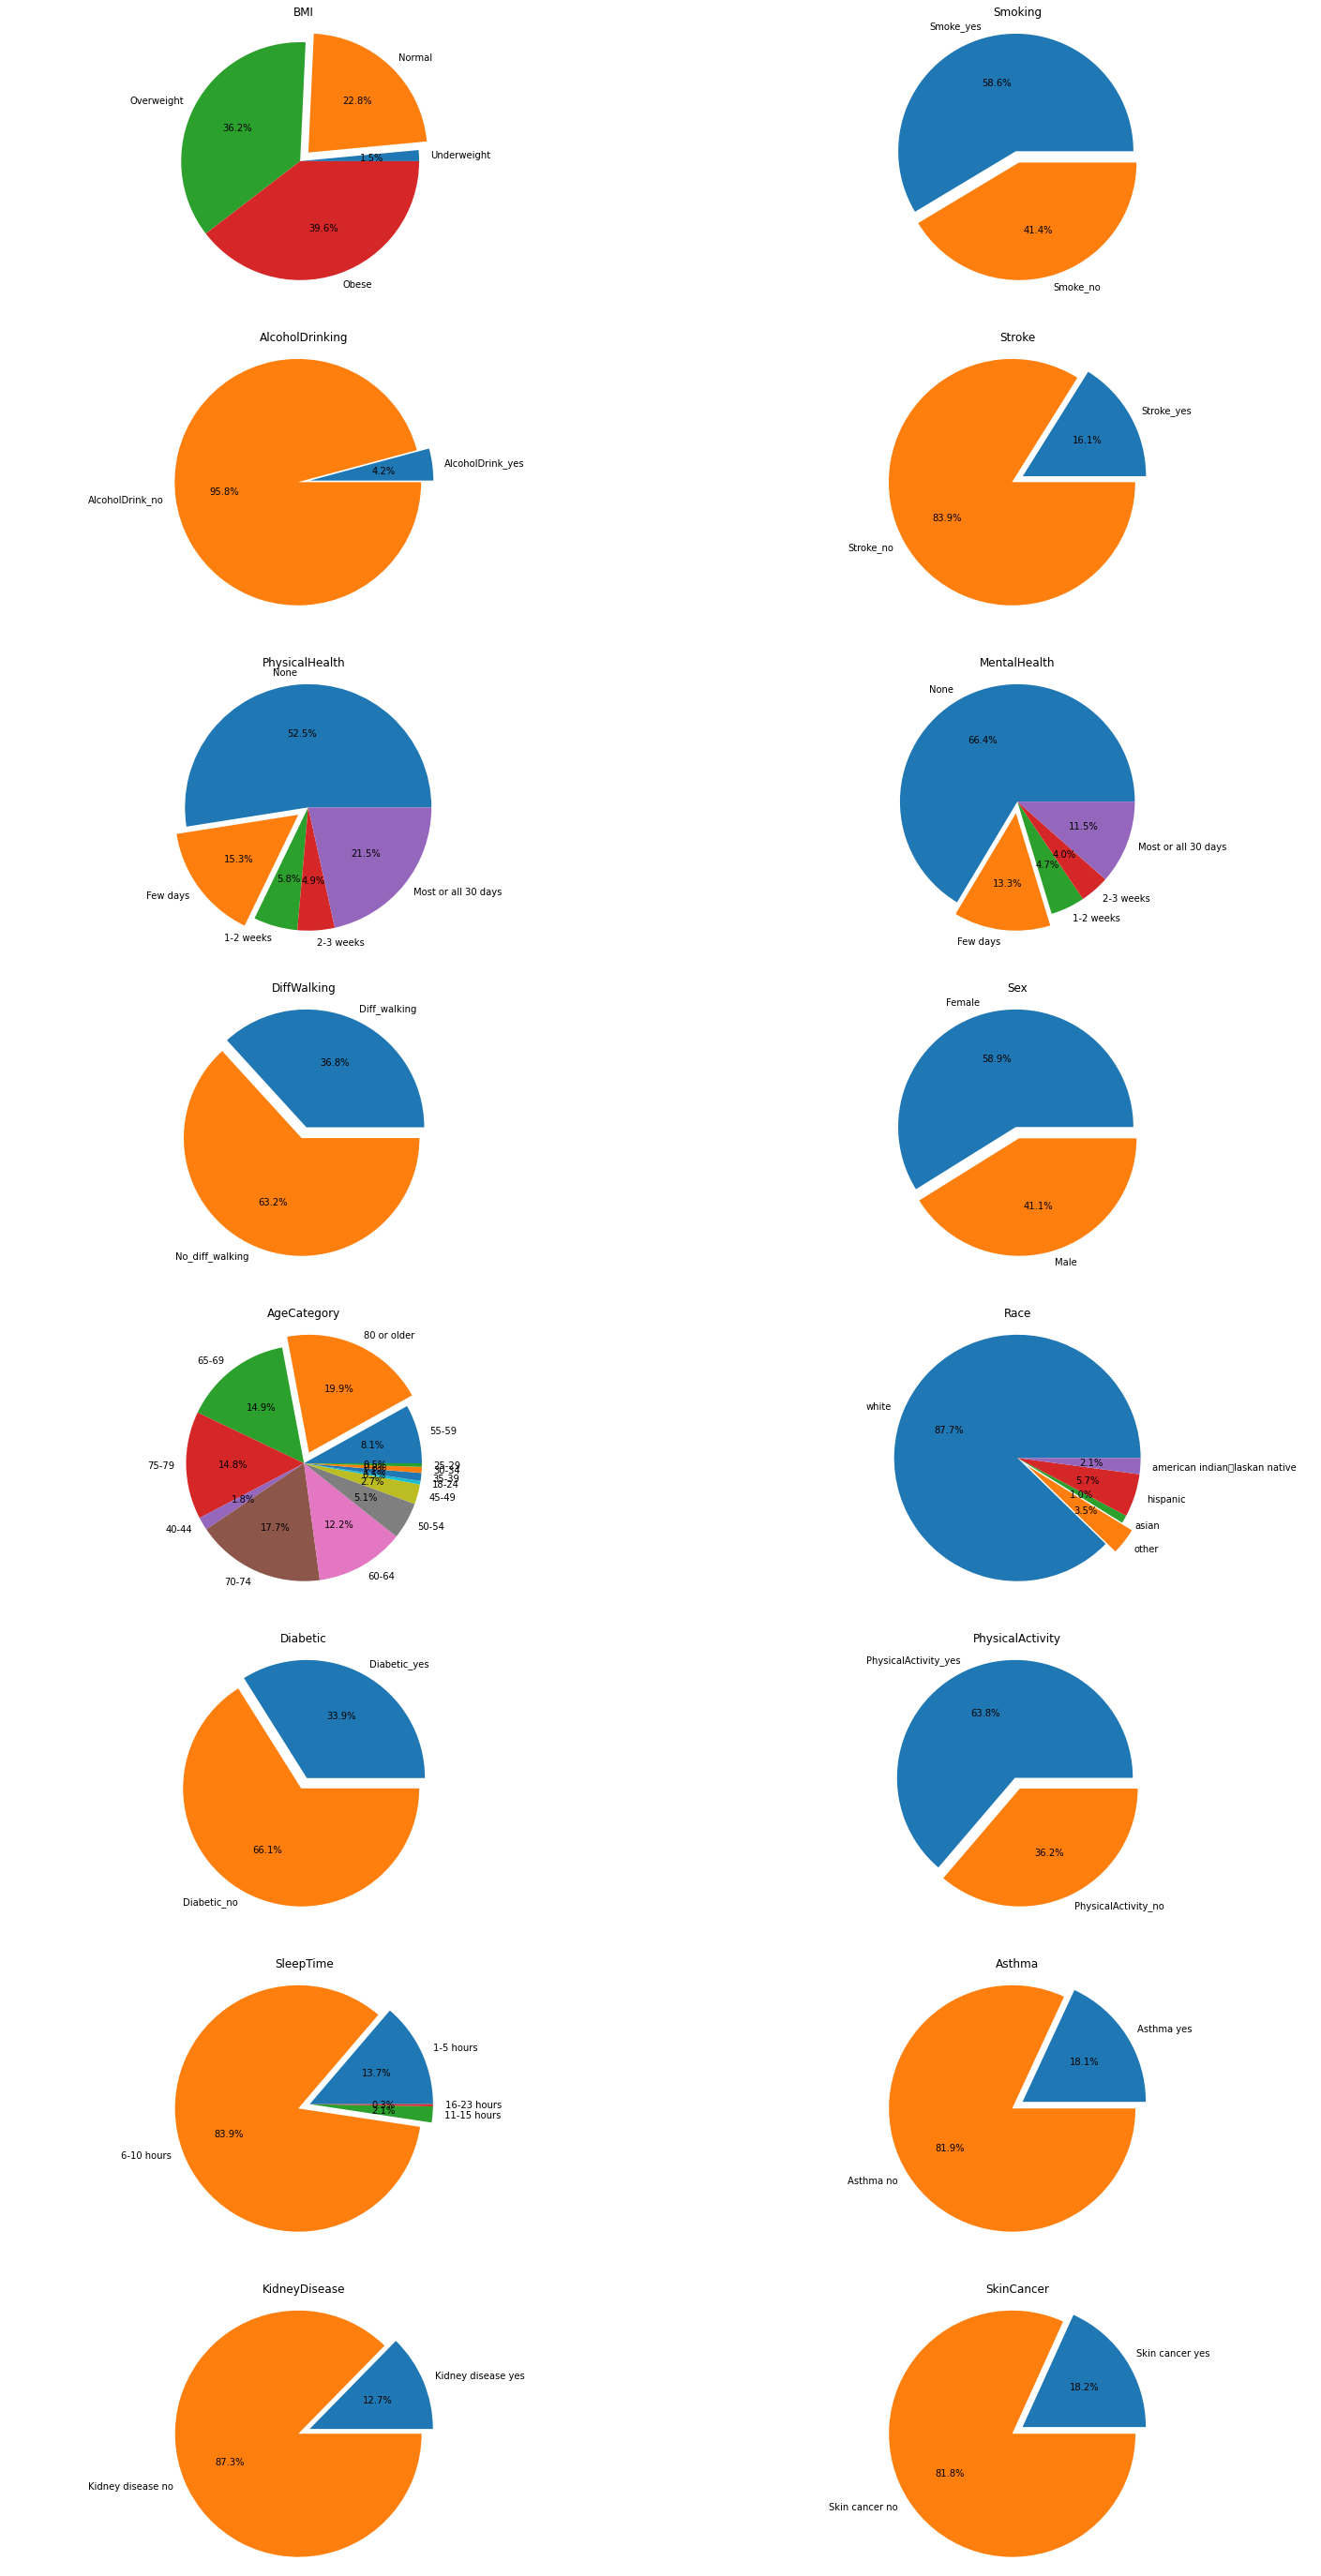

In [ ]:
fig, axes = plt.subplots(8, 2,figsize=(25,50))

#BMI
underweight = data[(data['HeartDisease'] =='Yes' )& (data['BMI'] <18.5 )].shape[0]
normal = data[(data['HeartDisease'] =='Yes' )& (data['BMI'] >=18.5 ) &(data['BMI'] <= 24.9)].shape[0]
overweight=data[(data['HeartDisease'] =='Yes' )& (data['BMI'] >=25) &(data['BMI'] <=29.9)].shape[0]
obese =data[(data['HeartDisease'] =='Yes') & (data['BMI'] >=30)].shape[0]


labels = 'Underweight', 'Normal','Overweight','Obese'
sizes = [underweight, normal, overweight, obese]
explode = (0, 0.1,0,0,)

axes[0,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[0,0].set_title("BMI")
axes[0,0].axis('equal')  

# Equal aspect ratio ensures that pie is drawn as a circle.
#Smoking
yes_smoke = data[(data['HeartDisease'] =='Yes' )& (data['Smoking'] == 'Yes')].shape[0]
no_smoke = data[(data['HeartDisease'] =='Yes' )& (data['Smoking'] == 'No')].shape[0]

labels = 'Smoke_yes', 'Smoke_no'
sizes = [yes_smoke, no_smoke]
explode = (0, 0.1)

axes[0,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[0,1].set_title("Smoking")
axes[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#AlcoholDrinking
yes_drink = data[(data['HeartDisease'] =='Yes' )& (data['AlcoholDrinking'] == 'Yes')].shape[0]
no_drink = data[(data['HeartDisease'] =='Yes' )& (data['AlcoholDrinking'] == 'No')].shape[0]

labels = 'AlcoholDrink_yes', 'AlcoholDrink_no'
sizes = [yes_drink, no_drink]
explode = (0, 0.1)

axes[1,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[1,0].set_title("AlcoholDrinking")
axes[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Stroke
yes_stroke = data[(data['HeartDisease'] =='Yes' )& (data['Stroke'] == 'Yes')].shape[0]
no_stroke = data[(data['HeartDisease'] =='Yes' )& (data['Stroke'] == 'No')].shape[0]

labels = 'Stroke_yes', 'Stroke_no'
sizes = [yes_stroke, no_stroke]
explode = (0, 0.1)

axes[1,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[1,1].set_title("Stroke")
axes[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#PhysicalHealth
no = data[(data['HeartDisease'] =='Yes' )& (data['PhysicalHealth'] == 0)].shape[0]
fewer = data[(data['HeartDisease'] =='Yes' )& (data['PhysicalHealth'] >= 1) &(data['PhysicalHealth']<=6)].shape[0]
one=data[(data['HeartDisease'] =='Yes' )& (data['PhysicalHealth'] >= 7) &(data['PhysicalHealth']<=12)].shape[0]
two =data[(data['HeartDisease'] =='Yes') & (data['PhysicalHealth'] >= 13) &(data['PhysicalHealth']<=18)].shape[0]
most =data[(data['HeartDisease'] =='Yes') & (data['PhysicalHealth'] >= 19) &(data['PhysicalHealth']<=30)].shape[0]

labels = 'None', 'Few days','1-2 weeks','2-3 weeks','Most or all 30 days'
sizes = [no,fewer, one, two, most]
explode = (0, 0.1,0,0,0)

axes[2,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[2,0].set_title("PhysicalHealth")
axes[2,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#MentalHealth
no = data[(data['HeartDisease'] =='Yes' )& (data['MentalHealth'] == 0)].shape[0]
fewer = data[(data['HeartDisease'] =='Yes' )& (data['MentalHealth'] >= 1) &(data['MentalHealth']<=6)].shape[0]
one=data[(data['HeartDisease'] =='Yes' )& (data['MentalHealth'] >= 7) &(data['MentalHealth']<=12)].shape[0]
two =data[(data['HeartDisease'] =='Yes') & (data['MentalHealth'] >= 13) &(data['MentalHealth']<=18)].shape[0]
most =data[(data['HeartDisease'] =='Yes') & (data['MentalHealth'] >= 19) &(data['MentalHealth']<=30)].shape[0]

labels = 'None', 'Few days','1-2 weeks','2-3 weeks','Most or all 30 days'
sizes = [no,fewer, one, two, most]
explode = (0, 0.1,0,0,0)

axes[2,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[2,1].set_title("MentalHealth")
axes[2,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#DiffWalking
yes_diff = data[(data['HeartDisease'] =='Yes' )& (data['DiffWalking'] == 'Yes')].shape[0]
no_diff= data[(data['HeartDisease'] =='Yes' )& (data['DiffWalking'] == 'No')].shape[0]

labels = 'Diff_walking', 'No_diff_walking'
sizes = [yes_diff, no_diff]
explode = (0, 0.1)

axes[3,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[3,0].set_title("DiffWalking")
axes[3,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Sex
male = data[(data['HeartDisease'] =='Yes' )& (data['Sex'] == 'Male')].shape[0]
female= data[(data['HeartDisease'] =='Yes' )& (data['Sex'] == 'Female')].shape[0]

labels = 'Female', 'Male'
sizes = [male, female]
explode = (0, 0.1)

axes[3,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[3,1].set_title("Sex")
axes[3,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#AgeCategory
ten = data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '18-24')].shape[0]
twenty = data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '25-29')].shape[0]
thirty=data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '30-34')].shape[0]
thirty_f =data[(data['HeartDisease'] =='Yes') & (data['AgeCategory'] == '35-39')].shape[0]
forty =data[(data['HeartDisease'] =='Yes') & (data['AgeCategory'] == '40-44')].shape[0]
forty_f = data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '45-49')].shape[0]
fifty = data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '50-54')].shape[0]
fifty_f=data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '55-59')].shape[0]
sixty =data[(data['HeartDisease'] =='Yes') & (data['AgeCategory'] == '60-64')].shape[0]
sixty_f =data[(data['HeartDisease'] =='Yes') & (data['AgeCategory'] == '65-69')].shape[0]
seventy = data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '70-74')].shape[0]
seventy_f = data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '75-79')].shape[0]
eighty=data[(data['HeartDisease'] =='Yes' )& (data['AgeCategory'] == '80 or older')].shape[0]


labels = '55-59', '80 or older', '65-69', '75-79', '40-44', '70-74','60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'
sizes = [fifty_f,eighty,sixty_f, seventy_f, forty, seventy,sixty,fifty,forty_f,ten,thirty_f, thirty, twenty]
explode = (0, 0.1,0,0,0,0,0,0,0,0,0,0,0)

axes[4,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[4,0].set_title("AgeCategory")
axes[4,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Race
white = data[(data['HeartDisease'] =='Yes' )& (data['Race'] == 'White')].shape[0]
other = data[(data['HeartDisease'] =='Yes' )& (data['Race'] == 'Other')].shape[0]
asian=data[(data['HeartDisease'] =='Yes' )& (data['Race'] == 'Asian')].shape[0]
hispanic =data[(data['HeartDisease'] =='Yes') & (data['Race'] == 'Hispanic')].shape[0]
native_american =data[(data['HeartDisease'] =='Yes') & (data['Race'] == 'American Indian/Alaskan Native')].shape[0]

labels = 'white','other','asian','hispanic','american indian\alaskan native'
sizes = [white, other, asian, hispanic, native_american]
explode = (0, 0.1,0,0,0)

axes[4,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[4,1].set_title("Race")
axes[4,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Diabetic
yes_d = data[(data['HeartDisease'] =='Yes' )& (data['Diabetic'] == 'Yes')].shape[0]
no_d= data[(data['HeartDisease'] =='Yes' )& (data['Diabetic'] == 'No')].shape[0]

labels = 'Diabetic_yes', 'Diabetic_no'
sizes = [yes_d, no_d]
explode = (0, 0.1)

axes[5,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[5,0].set_title("Diabetic")
axes[5,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#PhysicalActivity
yes_p = data[(data['HeartDisease'] =='Yes' )& (data['PhysicalActivity'] == 'Yes')].shape[0]
no_p= data[(data['HeartDisease'] =='Yes' )& (data['PhysicalActivity'] == 'No')].shape[0]

labels = 'PhysicalActivity_yes', 'PhysicalActivity_no'
sizes = [yes_p, no_p]
explode = (0, 0.1)

axes[5,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[5,1].set_title("PhysicalActivity")
axes[5,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#SleepTime
very_short = data[(data['HeartDisease'] =='Yes' )& (data['SleepTime'] >=1) &(data['SleepTime'] <=5)].shape[0]
short = data[(data['HeartDisease'] =='Yes' )& (data['SleepTime'] >=6) &(data['SleepTime'] <=10)].shape[0]
medium=data[(data['HeartDisease'] =='Yes' )& (data['SleepTime'] >=11) &(data['SleepTime'] <=15)].shape[0]
Long =data[(data['HeartDisease'] =='Yes') &(data['SleepTime'] >=16) &(data['SleepTime'] <=23)].shape[0]


labels = '1-5 hours','6-10 hours','11-15 hours','16-23 hours'
sizes = [very_short,short, medium, Long]
explode = (0, 0.1,0,0,)

axes[6,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[6,0].set_title("SleepTime")
axes[6,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#Asthma
asthma_yes = data[(data['HeartDisease'] =='Yes' )& (data['Asthma'] == 'Yes')].shape[0]
asthma_no = data[(data['HeartDisease'] =='Yes' )& (data['Asthma'] == 'No')].shape[0]


labels = 'Asthma yes', 'Asthma no'
sizes = [asthma_yes, asthma_no]
explode = (0, 0.1)

axes[6,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[6,1].set_title("Asthma")
axes[6,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#KidneyDisease
kidney_yes = data[(data['HeartDisease'] =='Yes' )& (data['KidneyDisease'] == 'Yes')].shape[0]
kidney_no = data[(data['HeartDisease'] =='Yes' )& (data['KidneyDisease'] == 'No')].shape[0]


labels = 'Kidney disease yes', 'Kidney disease no'
sizes = [kidney_yes, kidney_no]
explode = (0, 0.1)

axes[7,0].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[7,0].set_title("KidneyDisease")
axes[7,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#SkinCancer
cancer_yes = data[(data['HeartDisease'] =='Yes' )& (data['SkinCancer'] == 'Yes')].shape[0]
cancer_no = data[(data['HeartDisease'] =='Yes' )& (data['SkinCancer'] == 'No')].shape[0]


labels = 'Skin cancer yes','Skin cancer no'
sizes = [cancer_yes,cancer_no]
explode = (0, 0.1)

axes[7,1].pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%')
axes[7,1].set_title("SkinCancer")
axes[7,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.











Based on the graphs, it can be inferred that individuals who smoke (at least 100 cigarettes), female,elders and people with BMI greater than 30 are more predisposed to developing heart disease.

In [ ]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

To perform exploratory data analysis more conveniently, we have decided to convert all columns that contain non-numerical data into numerical data using one-hot encoding.For instance, we can use the starting age of each group as a representation. As for race, it is currently represented as a string with 6 different groups. The categories "White", "Black", "Asian", "American indian /alaskan native", "Other", and "Hispanic" may be assigned values of 5, 2, 1, 0, 4, and 3, respectively, based on alphabetical order. 

In [ ]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
data['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

This code below defines a function convertAge that takes a string input a, extracts the first two characters of the input string a, and returns a floating-point number representing those two characters as a number.

The code then applies this function to the column 'AgeCategory' in pandas DataFrame data using the apply() method with a lambda function. The lambda function passes each value of the 'AgeCategory' column to the converting function and replaces the original deal with the resulting floating-point number.
In summary, this code converts the first two characters of each string value in the 'AgeCategory' column of a pandas DataFrame to a floating-point number.

In [ ]:

def convertAge(a):
    numStr = ''
    numStr = a[0] + a[1]
    return np.float64(numStr)
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: convertAge(x))

  

<ipython-input-4-b99a4fbad36a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AgeCategory'] = data['AgeCategory'].apply(lambda x: convertAge(x))


This code encodes the non-numerical variables in the dataset using the LabelEncoder() function from the scikit-learn library. It first creates a list of feature names to be encoded, then iterates through each feature in the list and applies the LabelEncoder() function to transform the values of the feature from categorical to numerical. The encoded values are then assigned to the corresponding feature column in the dataset. 

In [ ]:
## Encode the non-numerical variables
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
le = preprocessing.LabelEncoder()
feature_names = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for feature in feature_names:
  data[feature] = le.fit_transform(data[feature])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55.0,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65.0,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75.0,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40.0,5,0,1,4,8.0,0,0,0


In [ ]:
data['AgeCategory'].unique()

array([55., 80., 65., 75., 40., 70., 60., 50., 45., 18., 35., 30., 25.])

In [ ]:
data['Race'].unique()

array([5, 2, 1, 0, 4, 3])

make the heatmap of the correlation matrix that helps us identify correlations between variables

<Axes: >

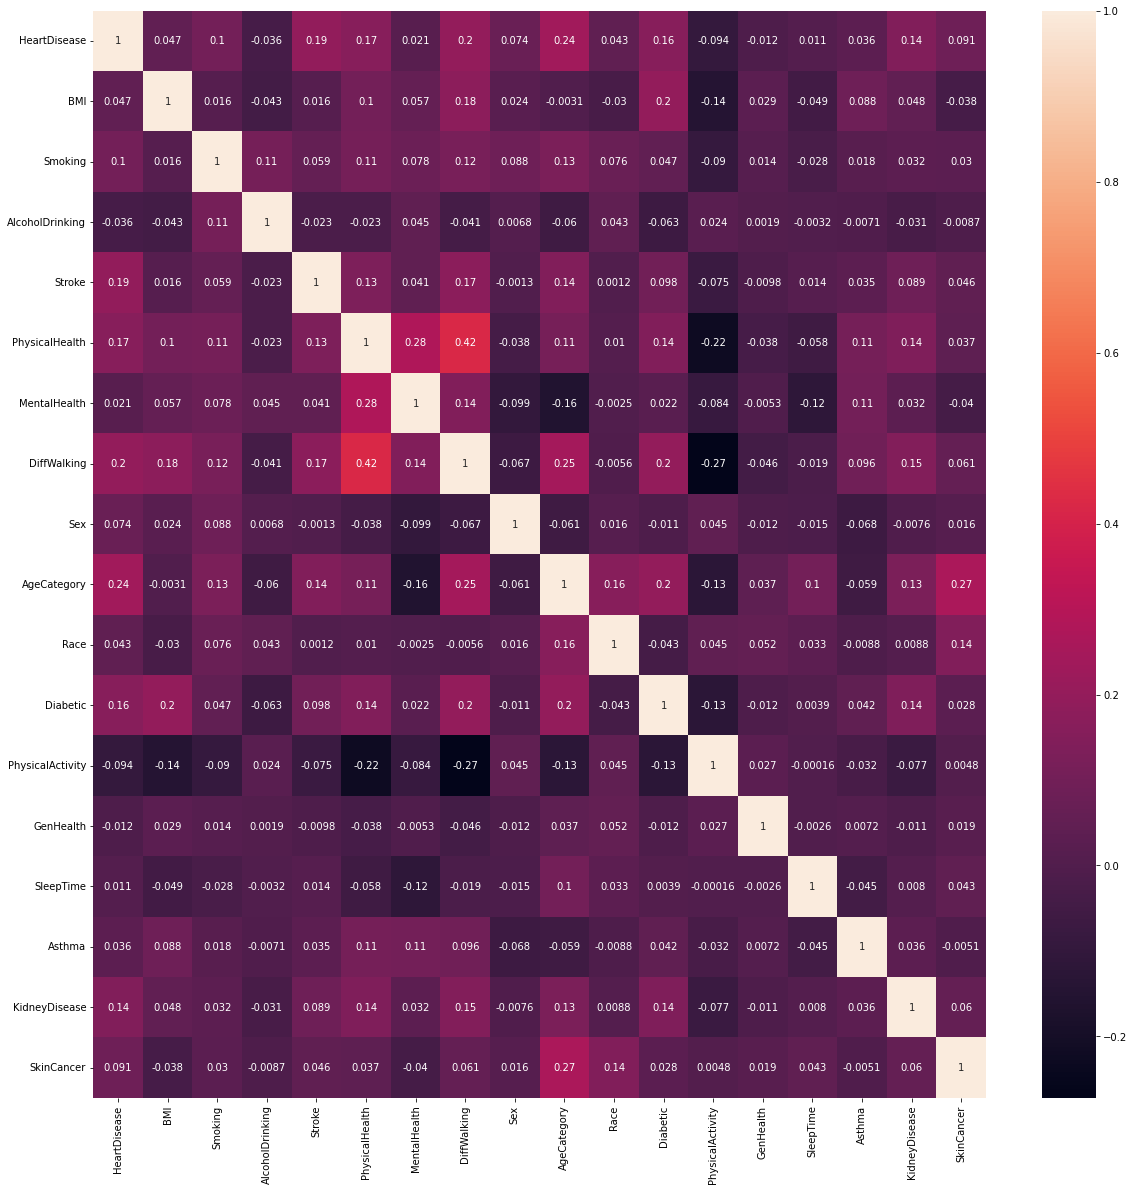

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(data.corr(), annot=True)

##(Base model): Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_squared_error

from sklearn.metrics import zero_one_loss, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

Split the data into train set and test set

In [ ]:
X = data.loc[:, data.columns != 'HeartDisease']
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(301717, 17)
(301717,)


This code creates a logistic regression classifier. 
The pipeline includes a StandardScaler transformer to standardize the input features, followed by a LogisticRegression estimator to fit the model to the data. 

The random_state parameter is set to 42 to ensure reproducibility of the results, and the penalty parameter is set to 'l2' to apply L2 regularization to the model coefficients. The resulting model can be used to classify new input data based on the trained model.

in our program we use it as base model.

In [ ]:
# Base model: Logistic regression
classifier_model = make_pipeline(
    StandardScaler(), 
    LogisticRegression(random_state=42, penalty='l2')
)

In [ ]:
classifier_model.fit(X_train, y_train)

y_pred_train = classifier_model.predict(X_train)
y_pred_test = classifier_model.predict(X_test)
print(f'Training Accuracy: {classifier_model.score(X_train, y_train)}')
print(f'Test Accuracy: {classifier_model.score(X_test, y_test)}')

Training Accuracy: 0.9103572012532757
Test Accuracy: 0.9099032215298952


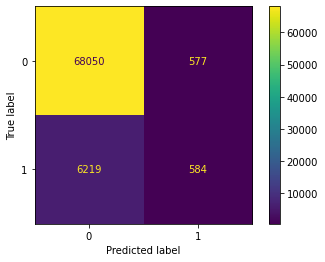

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn. metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     68627
           1       0.50      0.09      0.15      6803

    accuracy                           0.91     75430
   macro avg       0.71      0.54      0.55     75430
weighted avg       0.88      0.91      0.88     75430



The following code shows the steps we take to analyze the data. We calculate the fpr, tpr and AUC rate of the model, and also calculate the precision recall f1-score of the model for a more intuitive representation of the training results

In [ ]:
scores = classifier_model.predict_proba(X_test)[:,1]
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    # Step 1: Compute the confusion matrix
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    cm = confusion_matrix(y_test, y_pred)
    (true_negatives, false_positives, false_negatives, true_positives) = cm.ravel()
    fpr = false_positives / (false_positives + true_negatives)
    tpr = true_positives / (true_positives + false_negatives)
    fps.append(fpr)
    tps.append(tpr)


In [ ]:
def my_auc(fps, tps):
    arrFPS = np.array(fps)
    arrTPS = np.array(tps)
    auc = -1 * np.trapz(arrTPS, arrFPS)
    return auc

ROC AUC score: 0.8182767712332004


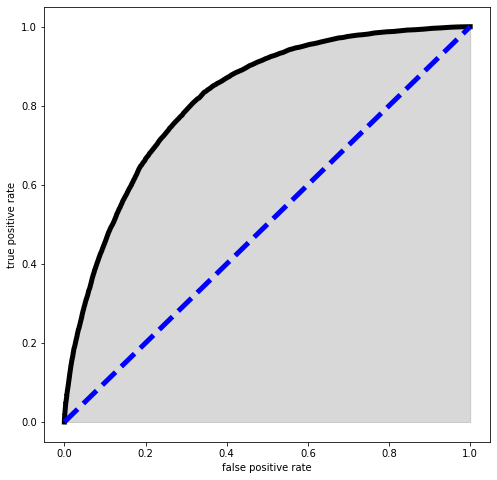

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");
print("ROC AUC score:", roc_auc_score(y_test, scores))

This code performs hyperparameter tuning for a logistic regression model using grid search with cross-validation. The hyperparameters to be searched are the regularization strength C and penalty type penalty. 

The logistic regression model is created as a pipeline with a StandardScaler transformer to standardize the input features, followed by the logistic regression estimator. The grid search is performed using 5-fold cross-validation on the training set, and the best hyperparameters are selected based on the highest validation score. 

This code aims to optimize the performance of the logistic regression model by finding the best hyperparameters that generalize well to unseen data.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid to search over
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2']
}

# Create a logistic regression pipeline with standard scaling
classifier_model = make_pipeline(StandardScaler(),
                                 LogisticRegression(random_state=42))

# Perform grid search with cross-validation using the training set
grid_search = GridSearchCV(classifier_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Validation score: {:.2f}".format(grid_search.best_score_))

Best hyperparameters:  {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2'}
Validation score: 0.91


Logistic regression ROC AUC score: 0.8184949114290039


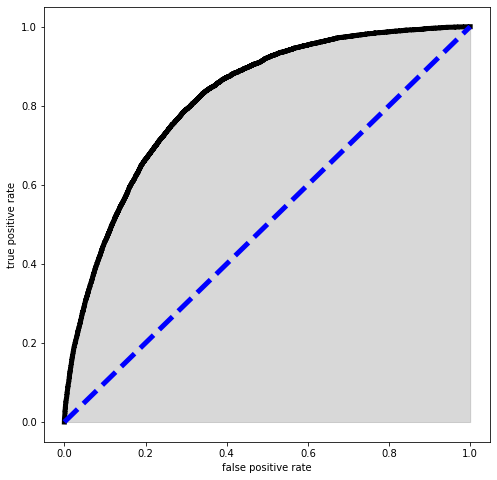

In [ ]:
logistic_scores = grid_search.predict_proba(X_test)[:, 1]
fps, tps, thresholds = roc_curve(y_test, logistic_scores)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");
print("Logistic regression ROC AUC score:", roc_auc_score(y_test, logistic_scores))

After hyperparameter tuning, the performance of logistic regression model does not improve much (only by about 0.0002). Now we move on to Random forest model to see if it can produce better results.

## Random Forest Section

This code trains a random forest classifier model using scikit-learn's RandomForestClassifier estimator. 

The trained model is then used to predict the target variable y_test for the test set X_test. Finally, the model's accuracy, F1 score, recall, and precision are calculated using scikit-learn's evaluation metrics.

This code aims to evaluate the performance of the random forest model in predicting the target variable for unseen data, using a set of commonly used evaluation metrics.

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_forest = rf_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
print('Random Forest model accuracy:', accuracy)
print('Random Forest model f1_score:', f1)
print('Random Forest model recall:', recall)
print('Random Forest model precision:', precision)

Random Forest model accuracy: 0.8994564496884528
Random Forest model f1_score: 0.17150972252567184
Random Forest model recall: 0.11539026899897105
Random Forest model precision: 0.33390046788600597


Random Forest ROC AUC score: 0.779227660631773


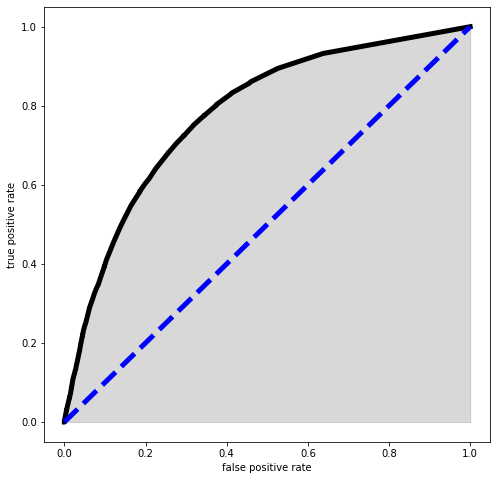

In [ ]:
forest_scores = rf_model.predict_proba(X_test)[:, 1]
fps, tps, thresholds = roc_curve(y_test, forest_scores)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");
print("Random Forest ROC AUC score:", roc_auc_score(y_test, forest_scores))

This code computes the receiver operating characteristic (ROC) curve and the area under the ROC curve (AUC) for a random forest classifier model. First, the predict_proba method is used to obtain the predicted probabilities of the positive class for the test set X_test. These probabilities are stored in the forest_scores variable. Then, the roc_curve function from sci-kit-learn is used to compute the actual positive rate (TPR) and false positive rate (FPR) for different threshold values. The TPR and FPR values are plotted to create the ROC curve using matplotlib. The area under the ROC curve is calculated using sci-kit-learn's roc_auc_score function. 

This code aims to evaluate the performance of the random forest model in terms of its ability to discriminate between positive and negative classes, using the ROC curve and AUC as evaluation metrics.

In [ ]:
# Skip this cell when rerun (takes too long)
# Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'bootstrap': [True],
    'n_estimators': [200, 300],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'max_features': [3, 4]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions on the test data using the best model
y_pred_forest = grid_search.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_forest)
f1 = f1_score(y_test, y_pred_forest)
recall = recall_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest)
print('Random Forest model accuracy:', accuracy)
print('Random Forest model f1_score:', f1)
print('Random Forest model accuracy:', recall) # Instead of "accuray", the string on the left should be changed to "recall"
print('Random Forest model accuracy:', precision) # Instead of "accuracy", the string on the left should be changed to "precision"
# We plan not to rerun this cell for this typing error because it takes a long time

Best parameters:  {'bootstrap': True, 'max_depth': 20, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 300}
Best score:  0.9109670438410736
Random Forest model accuracy: 0.9106721463608644
Random Forest model f1_score: 0.11061246040126715
Random Forest model accuracy: 0.06159047479053359
Random Forest model accuracy: 0.5420439844760673


This code aims to evaluate the performance of the random forest model in predicting the target variable for unseen data using the best hyperparameters found in the previous grid search.

The code performs hyperparameter tuning for a random forest classifier model using grid search with cross-validation. The best hyperparameters found in the previous grid search are directly used to create the param_grid dictionary. 

And then the RandomForestClassifier estimator is created with the random_state parameter set to 42. The GridSearchCV object is defined with a 5-fold cross-validation, and the best hyperparameters are selected based on the highest validation score. The predict_proba method is used to obtain the predicted probabilities of the positive class (i.e., the probability that the target variable is 1) for the test set X_test using the best hyperparameters found in the grid search. 

Then, the ROC curve and AUC are calculated and plotted using the roc_curve and roc_auc_score functions from scikit-learn and printed it.

Random Forest ROC AUC score: 0.8252825879188277


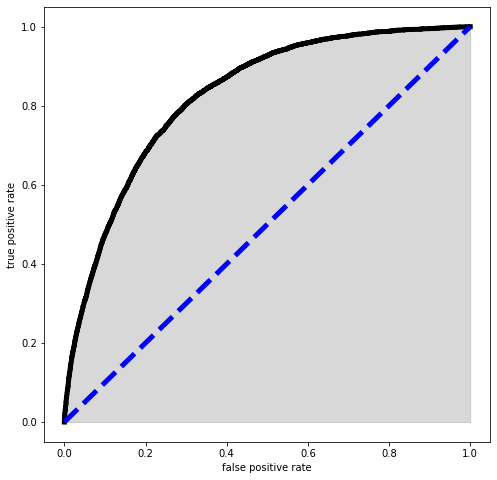

In [ ]:
# In order to save time and not fitting the model 5*8 = 40 times when restarting the model, we directly copy the best param we found in the last cell.
from sklearn.model_selection import GridSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Use the best parameter
param_grid = {
    'bootstrap': [True],
    'n_estimators': [300],
    'max_depth': [20],
    'min_samples_split': [10],
    'max_features': [3]
}

# Define the GridSearchCV object
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)
forest_scores_best = grid_search.predict_proba(X_test)[:, 1]
fps, tps, thresholds = roc_curve(y_test, forest_scores_best)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");
print("Random Forest ROC AUC score:", roc_auc_score(y_test, forest_scores_best))

Using the best parameteres we found, we have improved the ROC AUC score of random forest model from 0.779 to 0.825, and it also has a better performance than the logistic model, which has a score of 0.818. Now we move on to the SVM model.

## SVM SECTION

This code trains a linear SVM classifier with regularization parameter C=1000 and sets probability=True to enable probability estimates. It then uses the trained classifier to predict the probabilities of positive class for test data X_test and converts these scores to possibilities using a sigmoid function.

Next, it computes the Receiver Operating Characteristic (ROC) curve, which is a plot of the true positive rate (TPR) against the false positive rate (FPR) for various classification thresholds. The ROC curve is constructed by changing the classification threshold from 0 to 1, and at each threshold, the TPR and FPR are computed based on the predicted probabilities and true labels for test data.

The plotted ROC curve is then compared to the diagonal line representing random chance using a dashed blue line. The area under the ROC curve (ROC AUC score) is also computed and printed. The ROC AUC score provides a measure of the classifier's overall performance, with a higher score indicating better discrimination between positive and negative classes.

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1000, random_state=42, probability=True)
svm.fit(X_train,y_train)

ROC AUC score: 0.7867305541438893


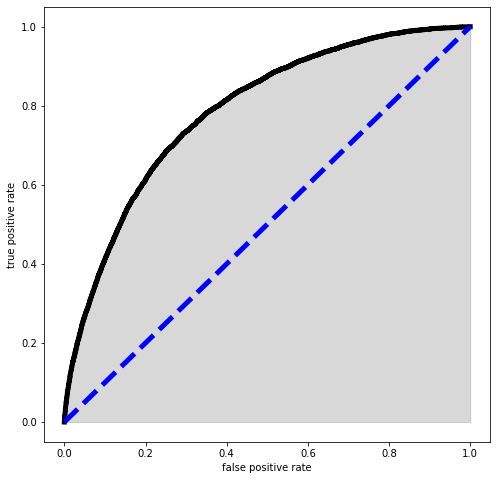

In [ ]:
SVM_scores = svm.predict_proba(X_test)[:, 1]
SMV_scores = 1/(1 + np.exp(-SVM_scores))
fps, tps, thresholds = roc_curve(y_test, SVM_scores)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");
print("ROC AUC score:", roc_auc_score(y_test, SVM_scores))

This code performs hyperparameter tuning for a linear SVM classifier with regularization parameter C using grid search with 5-fold cross-validation on the training set X_train and y_train. The regularization parameter C is tuned over a range of values defined by the param_grid dictionary.

&emsp;

After that the GridSearchCV function from scikit-learn is used to perform the grid search, which evaluates the performance of the classifier with different hyperparameters using cross-validation. After the grid search is complete, the best hyperparameters and corresponding validation score are printed.As we shouwn in result.

In [ ]:
# Skip this when rerun (takes too long)
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create a SVM model object with the linear kernel
svm = SVC(kernel='linear', random_state=42, probability=True)

# Perform grid search with cross-validation using the training set
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Validation score: {:.2f}".format(grid_search.best_score_))

Best hyperparameters:  {'C': 0.001}
Validation score: 0.90


ROC AUC score: 0.7808580456343859


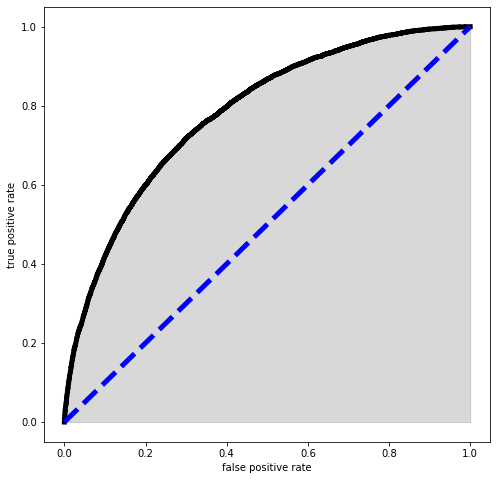

In [ ]:
# In order to save time and not fitting the model 6 times when restarting the model, we directly copy the best param (C = 0.001)we found in the last cell.
svm_best = SVC(kernel='linear', C= 0.001, random_state=42, probability=True)
svm_best.fit(X_train, y_train)

SVM_scores = svm_best.predict_proba(X_test)[:, 1]
SMV_scores = 1/(1 + np.exp(-SVM_scores))
fps, tps, thresholds = roc_curve(y_test, SVM_scores)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");
print("ROC AUC score:", roc_auc_score(y_test, SVM_scores))

We get an AUC result that doesn't look very good (smaller than that of random forest model), and the performance does not increase after hyperparameter tuning. We will then explain the possible reasons why it doesn't look so good

# Discussion

### Interpreting the result

In the above code, we used logical regression as the base model. And after comparing random forest and linear SVM, we found that random forest performs better than logical regression, while SVM is worse than the base model. We discussed this phenomenon and came to the following conclusions that need to be noted.<br>

> SVM is a linear model that can only separate data points using a linear    boundary, This causes it may not be able to accurately represent the relationships in features when there are too many/overly complex features.

In such cases, the linear boundary may not be able to separate the classes well, leading to poor classification accuracy. Moreover, as the number of features increases, the complexity of the optimization problem in linear SVM also increases, which can lead to longer training times and higher computational costs. This can make it difficult to train the model on large datasets with many features. And our dataset is too large and complex for the SVM model with our hardware. (it took us a full 24 hours to get the current results)<br><br>

At the same time we observe that the random forest performs better in this problem, and we believe that the reason for this is it can handle a large number of features by selecting a random subset of features at each split in the decision tree, which helps to reduce overfitting and improve generalization. <br><br>


Additionally, random forests can handle complex non-linear relationships between the features and the target variable, by constructing multiple decision trees on random subsets of the training data and aggregating their predictions. This fits very well with the data we use in our projects: we have a lot of data compared to the performance of our hardware devices, and a lot of features for the data itself. This maximizes the advantages of random forest and therefore it performs best among the three models.

&emsp;

Finally, we will briefly mention logical regression, which performs well in classification problems with multi-feature data because of its ability to process the data using regularization. However, compared to SVM and random forest, logical regression is difficult to describe the degree of influence of each feature on its results - its functional limitations make us decide to use it as a base model rather than as the main method.


&emsp;


To summarize, logical regression and random forest perform well with a large number of features because logical regression can use regularization to prevent overfitting while random forest can achieve the same result by randomizing the features on each decision tree. The same effect is achieved by randomizing the features in each decision tree. However, SVM may encounter some problems when dealing with data containing a large number of features. When the number of features increases, the optimal linear classifier may become more complex, and the computational cost and time may increase.

&emsp;

### Limitations


* Feature limitations: the dataset we selected excompasses a wide range of features related to heart disease, while there may exist additional factors that are not included which have the potential to enhance the accuracy of the model.  

* Time constraint: since we are using a big dataset (300k +), fitting the model takes a lot of time (especially the random forest model and the SVM model). If we have more time, we can try more hyperparameters and the performance can potentially be further increased.


&emsp;

### Ethics & Privacy

There is no significant privacy issue here because the names and social security numbers of the patients were removed from the database. Ethical concern: this dataset is conducted by the CDC using telephone surveys, and their targets are the U.S. residents. Therefore, these databases cannot represent potential patients all over the world. Therefore, it is possible to be subject to a collection bias. We will address this issue by clearly stating the sources and informing the audience that this research can only be a reference instead of an authority.

&emsp;

### Conclusion

In this project, our team’s main goal is to increase the accuracy of heart disease detection based on the patient's various health markers. To train the most relevant predictive model, we compared various algorithms and decided to use logical regression as the base model while also performing random forests. We believe the use of our model can aid in the identification of high-risk patients, allowing for early intervention and therapy that can ultimately stop or delay the beginning of heart disease. We believe our automatic learning algorithms also have great potential in predicting heart disease and curing them since those algorithms can automatically learn and analyze from large amounts of data and use it for prediction and judgment. In predicting heart disease, they can learn and build prediction models from clinical information of heart disease patients, which can be very helpful for doctors to more accurately understand the risk level of patients and develop effective treatment plans. Moreover, by training a large number of clinical data from heart disease patients, features and patterns are extracted and prediction models are built. This allows us to predict the risk of heart disease in patients and to develop individualized treatment plans for patients based on the prediction results.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): “Cardiovascular Diseases.” World Health Organization, World Health Organization, https://www.who.int/health-topics/cardiovascular-diseases. <br> 
<a name="admonishnote"></a>2.[^](#admonish): Heart Disease Prediction Using Machine Learning Algorithms - Iopscience. https://iopscience.iop.org/article/10.1088/1757-899X/1022/1/012072/meta. <br>
<a name="sotanote"></a>3.[^](#sota): Pal, Madhumita, et al. “Risk Prediction of Cardiovascular Disease Using Machine Learning Classifiers.” Open Medicine (Warsaw, Poland), U.S. National Library of Medicine, 17 June 2022, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9206502/. 
